<a href="https://colab.research.google.com/github/weidongshao/Employee-Directory-App/blob/master/Tutorial_Neural_Network_From_Scatch_(MNIST_with_NumPy_only).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial: Neural Network From Scatch (MNIST with NumPy only)

## Introduction

Welcome to this hands-on tutorial on deep learning! In this tutorial, we will dive into the fascinating world of neural networks and explore how to build a simple yet powerful model for MNIST digit classification. What makes this tutorial unique is that we will be implementing the entire model using only the NumPy library, without relying on higher-level frameworks like TensorFlow or PyTorch.

This tutorial is designed for software engineers who have a basic understanding of neural network fundamentals and mathematics behind it. It aims to provide you with a solid foundation in deep learning concepts and empower you to build models from scratch.

## Dataset: MNIST

The MNIST dataset is a classic benchmark in the field of machine learning. It consists of $60,000$ training images and $10,000$ testing images of handwritten digits from 0 to 9. Each image is a grayscale $28\times 28$ pixel array. The task is to train a model that can accurately classify these images into their respective digit categories.

## Approach: Fully Connected Neural Network

In this tutorial, we will start by implementing a fully connected neural network, also known as a feedforward neural network or a multilayer perceptron (MLP). We will build the network layer by layer using NumPy arrays and apply nonlinear activation functions like ReLU (Rectified Linear Unit) and softmax to introduce nonlinearities and enable the model to capture complex patterns in the data.

## Tutorial Outline

1. Loading and Preprocessing the Data
    - Downloading the MNIST dataset
    - Loading and normalizing the data
    - Splitting the data into training and testing sets

2. Implementing the Model Architecture
    - Defining the structure of the fully connected neural network
    - Initializing the model's parameters (weights and biases)

3. Forward Propagation
    - Implementing the forward pass to compute predictions

4. Loss Function and Backpropagation
    - Defining the cross-entropy loss function
    - Implementing the backward pass for gradient computation

5. Training the Model
    - Implementing the stochastic gradient descent (SGD) algorithm
    - Updating the model's parameters using gradient descent

6. Evaluating the Model
    - Predicting the labels for the test set
    - Calculating accuracy and other evaluation metrics

By the end of this tutorial, you will have gained hands-on experience in building and training a fully connected neural network using only NumPy. You will also understand the underlying principles of deep learning and be equipped with the knowledge to explore more advanced concepts and techniques in future tutorials.

Now, let's dive into the world of deep learning and start building our MNIST digit classification model from scratch using NumPy!



# 2-layer Neural Network - Fully Connected

We introduce one hidden layer of dimension 64.

The output will be fed to a softmax layer

<img src="https://drive.google.com/uc?id=1c3DdWRLfcXbrmd73oyWFTajstIspM1BG" width="600">

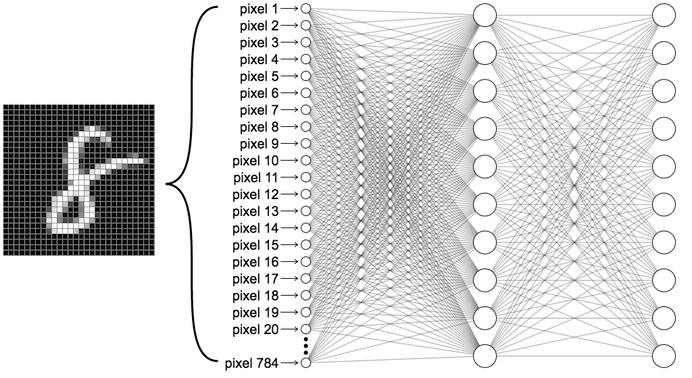

In [ ]:
from keras.datasets import mnist
import numpy as np

# Load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_labels[1000]

0

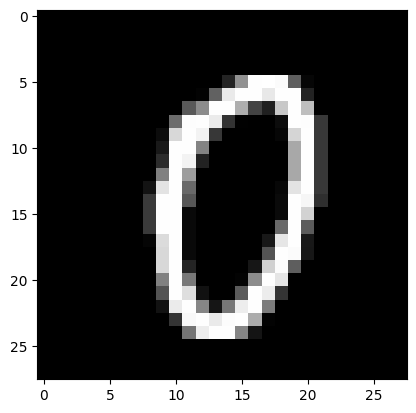

In [ ]:
plt.imshow(train_images[1000], cmap='gray')

In [ ]:
train_labels[0]

5

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0][14:16]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0]], dtype=uint8)

# Preprocess data


It is common to scale the input values.

The average of each input variable over the training set should be close
to zero.


In [ ]:
# Preprocess data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
train_images[0][300:500]

In [ ]:
def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)



## Initialization of Weights and Normalization Factor

In deep learning, proper initialization of weights is crucial for the model's convergence and performance. In this tutorial we initialize the weights of the first layer (input to hidden layer) using the following line of code:

```python
W1 = np.random.randn(input_nodes, hidden_nodes) * np.sqrt(2. / input_nodes)
```

The normalization factor, `np.sqrt(2. / input_nodes)`, is applied to the randomly initialized weights to ensure that they are initialized in a way that helps the network learn effectively.

### Xavier/Glorot Initialization

The normalization factor in the initialization code is derived from the Xavier (or Glorot) initialization technique. Xavier initialization is a widely used weight initialization method that aims to keep the variances of the activations and gradients approximately the same across layers. This helps with smoother and more stable training.

In our case, the normalization factor, `np.sqrt(2. / input_nodes)`, is based on the Xavier initialization formula for a normal distribution. It scales the randomly initialized weights by the square root of the ratio between 2 and the number of input nodes. This factor helps to prevent the activation values from becoming too large or too small, promoting a healthier flow of gradients during backpropagation.

By applying this normalization factor during weight initialization, we set a reasonable scale for the weights, ensuring that they are neither too large to cause saturation nor too small to result in vanishing gradients.

It's worth noting that the choice of weight initialization technique can depend on various factors, such as the activation functions used, the network architecture, and the specific problem domain. Xavier initialization is a commonly used technique and serves as a good starting point for weight initialization in many scenarios.



In [ ]:
def initialize_parameters(input_nodes, hidden_nodes, output_nodes):
    np.random.seed(0)

    W1 = np.random.randn(input_nodes, hidden_nodes) * np.sqrt(2. / input_nodes)
    b1 = np.zeros((1, hidden_nodes))

    W2 = np.random.randn(hidden_nodes, output_nodes) * np.sqrt(2. / hidden_nodes)
    b2 = np.zeros((1, output_nodes))

    return W1, b1, W2, b2


# Forward Propagation

Now we will pass our inputs through the network for the first time. We start by calculating the input and output for our hidden layer, and then use that output as input for the output layer.

In [ ]:
def forward_propagation(X, W1, b1, W2, b2):
    ''' The calculation for the 2-layer models. There is one hidden layer (A1).
    Args:
      X: the input vector
      W1, b1, W2, b2: the model parameters, weight/bias for fully connected layers

    Retuns:
      A tuple of the inference output A2, and model internal state

    '''
    Z1 = np.dot(X, W1) + b1

    # A1 is the hidden layer output
    A1 = relu(Z1)

    Z2 = np.dot(A1, W2) + b2
    # A2 is the final output
    A2 = softmax(Z2)

    cache = (Z1, A1, Z2, A2)

    # return the output, along with the internal states
    return A2, cache


In [ ]:
def predict(X, params):
  W1, b1, W2, b2 = params
  A2, _ = forward_propagation(X, W1, b1, W2, b2)
  predictions = np.argmax(A2, axis=1)
  return predictions

# Experiment with prediction results

We are conducting an experiment to analyze the prediction results of an untrained neural network model used for a classification task. The network is initialized with random parameters, indicating that it has not undergone any training. Our expectation is that the predictions generated by the model will be comparable to random guesses.


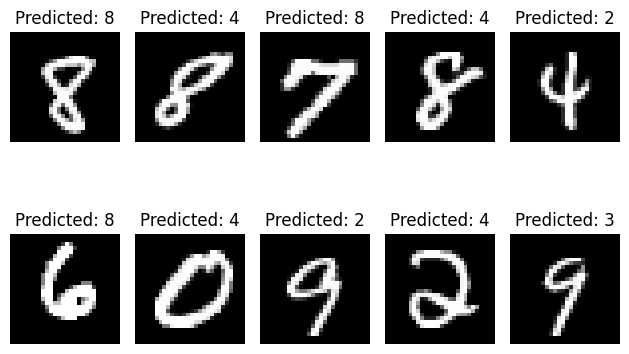

In [ ]:
import matplotlib.pyplot as plt

params =  initialize_parameters(28*28, 64, 10)


# Predicting labels for the entire test set
predictions = predict(test_images, params)

# Selecting 10 random indices
indices = np.random.choice(test_images.shape[0], size=10, replace=False)

for i, idx in enumerate(indices):
    image = test_images[idx]
    label = predictions[idx]  # Convert one-hot encoded prediction to label

    plt.subplot(2, 5, i+1)  # Displaying 10 images in a 2x5 grid
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {label}")
    plt.axis('off')  # Hide axis for clarity

plt.tight_layout()
plt.show()

In [ ]:
predictions.shape

(10000,)

# cross-entropy loss function

## Entropy:


$$ H(x) = -p\log p - (1-p) log(1-p) $$


![Sonny and Mariel high fiving.](https://www.researchgate.net/profile/Lukasz-Debowski/publication/321487643/figure/fig1/AS:567681575522304@1512357242682/Entropy-HX-p-log-p-1-p-log1-p-for-P-X-0-p-and-P-X-1-1-p.png)




## Understanding Cross-Entropy Loss for N-Class Classification

In the context of multi-class classification, such as the MNIST digit classification task, it is essential to understand the concept of cross-entropy loss. Cross-entropy is a commonly used loss function that measures the dissimilarity between the predicted probabilities and the true labels.

### Intuition Behind Cross-Entropy Loss

The cross-entropy loss takes into account the predicted probabilities for each class and compares them to the true labels. The loss value increases as the predicted probabilities deviate from the true labels.

To understand this concept intuitively, imagine a scenario where the true label for a particular image is "3" (represented as a one-hot encoded vector [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]). If the model assigns high probabilities to classes other than "3" (e.g., [0.1, 0.2, 0.3, 0.1, 0.1, 0.05, 0.05, 0.1, 0.05, 0.05]), the cross-entropy loss will be larger. Conversely, if the predicted probabilities align closely with the true label (e.g., [0.05, 0.05, 0.05, 0.7, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]), the cross-entropy loss will be smaller.

### Mathematical Formulation

The mathematical formulation of cross-entropy loss for n-class classification involves taking the negative logarithm of the predicted probability of the true class. For a single training example, the cross-entropy loss is calculated as follows:

$$ L = -\sum (y_{\text{true}} \cdot \log(y_{\text{pred}}))$$


Where:
- $y_{\text{true}}$ is the true label (one-hot encoded vector)
- $y_{\text{pred}}$ is the predicted probability vector for each class

The sum is taken over all classes. The loss is minimized when the predicted probabilities for the true class approach 1.

### Benefits of Cross-Entropy Loss

Cross-entropy loss has become a popular choice for classification tasks due to several advantages. It not only measures the difference between predicted and true labels but also takes into account the confidence or uncertainty of the model's predictions. By penalizing incorrect predictions more strongly, it encourages the model to assign higher probabilities to the correct class, leading to improved accuracy and convergence during training.

In addition, the cross-entropy loss is differentiable, making it suitable for optimization algorithms like backpropagation, which rely on gradients for updating the model's parameters.



In [ ]:
def compute_cost(A2, Y):
    ''' Compute the cross-entropy loss.
    Args:
      Y: the true value (label)
      A2: the predicted probablity (the final output from the net)

    Returns:
      the cross-entropy loss value
    '''
    cost = -np.sum(Y * np.log(A2)) / Y.shape[0]
    return cost


In [ ]:
def back_propagation(X, Y, cache, W1, W2):
    (Z1, A1, Z2, A2) = cache

    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2) / X.shape[0]
    db2 = np.sum(dZ2, axis=0, keepdims=True) / X.shape[0]

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * (Z1 > 0)
    dW1 = np.dot(X.T, dZ1) / X.shape[0]
    db1 = np.sum(dZ1, axis=0, keepdims=True) / X.shape[0]

    return dW1, db1, dW2, db2


#gradient based learning machine

In [ ]:
from IPython.display import Image
Image('x_machine.png')

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

# Backpropagtion - Bias

In the backpropagation process, the calculation of gradients not only involves the weights (parameters) but also the biases of the neural network. The bias term represents the intercept or offset of each neuron in a layer, allowing the network to shift the activation function's output.

For example,
```
db2 = np.sum(dZ2, axis=0, keepdims=True) / X.shape[0]
```

`dZ2` represents the gradient of the cost with respect to the activations of the second layer (output layer). The bias gradient `db2` is calculated by taking the sum of `dZ2` along the axis corresponding to the examples (axis 0, as each example has its own bias term) and then dividing by the number of examples (`X.shape[0]`).

Essentially, this calculation accumulates the gradients for the bias term of each neuron in the output layer by summing the gradients across all examples. Dividing by the number of examples ensures that the gradient is averaged appropriately to account for different batch sizes or dataset sizes.

By updating the biases based on these gradients during the optimization process, the neural network can learn to shift the activation function's output, improving the model's ability to capture complex patterns and make more accurate predictions.

It's important to note that biases, similar to weights, contribute to the overall learning process of the neural network. Including them in the backpropagation calculations ensures that the model can adjust both weights and biases to optimize its performance during training.


# Backpropagtion - Weights

## Some math background

For a simple linear transformation (i.e., fully connected layer or dense layer) in a neural network, if the forward pass of the layer is defined by
$$ y = Wx + b$$

(where $W$ is the weight matrix),

Conceptually, when you are backpropagating the gradients, you are essentially "reversing" the forward pass of your network. Because of the way matrix multiplication works, the "reversed" version of this operation involves the transpose of the matrix.

The backward pass for this layer would indeed involve the transpose of $W$: $W^T$.

## Example: Back Propagation for the 2nd FC Layer

```python
dW2 = np.dot(A1.T, dZ2) / X.shape[0]
```

`dW2` represents the gradient of the cost with respect to the weights of the second layer (output layer). It's calculated by taking the dot product of the transpose of the activation values of the previous layer (`A1`) and the gradient of the cost with respect to the activations of the current layer (`dZ2`). Finally, the result is divided by the number of examples (`X.shape[0]`) to account for different batch sizes or dataset sizes.

The backpropagation process calculates the gradients of the cost function with respect to the weights in order to update them during the training phase. This allows the neural network to learn the optimal values for the weights that minimize the cost function and improve the model's performance.

The dot product between `A1.T` and `dZ2` is a matrix operation that aggregates the gradients for each weight connecting the previous layer (hidden layer) to the current layer (output layer). The transpose of `A1` is taken to align the dimensions appropriately for the dot product. The resulting gradients represent how the change in the weights affects the overall cost.

Dividing the result by the number of examples ensures that the gradients are appropriately averaged, accommodating different batch sizes or dataset sizes. This normalization step helps maintain consistency in the gradient updates during training.

By updating the weights based on these gradients using optimization algorithms like gradient descent, the neural network adjusts the connection strengths between neurons to minimize the cost and improve its predictive performance.



In [ ]:
def back_propagation(X, Y, cache, W1, W2):
    (Z1, A1, Z2, A2) = cache

    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2) / X.shape[0]
    db2 = np.sum(dZ2, axis=0, keepdims=True) / X.shape[0]

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * (Z1 > 0)
    dW1 = np.dot(X.T, dZ1) / X.shape[0]
    db1 = np.sum(dZ1, axis=0, keepdims=True) / X.shape[0]

    return dW1, db1, dW2, db2


In [ ]:
def update_parameters(params, grads, learning_rate):
    ''' This is used in the training loop to update the model
    parameters. the delta value is from the gradient and the learning rate.
     Args:
       params: the model parameters (weights and bias)
       grads: the gradient from the back propagation calculation.
       learning_rate: tunable parameter in the training process.
    '''
    W1, b1, W2, b2 = params
    dW1, db1, dW2, db2 = grads

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    return W1, b1, W2, b2


In [ ]:
def train_model(X, Y, hidden_nodes, num_iterations, learning_rate):
    input_nodes = X.shape[1]
    output_nodes = Y.shape[1]

    # Initialize parameters
    W1, b1, W2, b2 = initialize_parameters(input_nodes,
                                           hidden_nodes,
                                           output_nodes)

    for i in range(num_iterations):
        # Forward propagation
        A2, cache = forward_propagation(X, W1, b1, W2, b2)

        # Compute cost
        cost = compute_cost(A2, Y)

        # Backward propagation
        grads = back_propagation(X, Y, cache, W1, W2)

        # Update parameters
        params = update_parameters((W1, b1, W2, b2),
                                   grads,
                                   learning_rate)
        W1, b1, W2, b2 = params

        if i % 10 == 0 or i == num_iterations:
            print(f"Cost at iteration {i}: {cost}")

    return W1, b1, W2, b2


In [ ]:
def evaluate_model(X, Y, params):
    W1, b1, W2, b2 = params
    A2, _ = forward_propagation(X, W1, b1, W2, b2)
    predictions = np.argmax(A2, axis=1)
    labels = np.argmax(Y, axis=1)
    accuracy = np.mean(predictions == labels)
    return accuracy

In [ ]:
train_images[0][:20]

In [ ]:
# Train the model and evaluate the result

# Convert labels to one-hot vectors
train_labels_1 = np.eye(10)[train_labels]
test_labels_1 = np.eye(10)[test_labels]

# Train the model
params = train_model(train_images,
                     train_labels_1,
                     hidden_nodes=64,
                     num_iterations=40,
                     learning_rate=0.1)

# Evaluate the model
accuracy = evaluate_model(test_images, test_labels_1, params)
print(f"Test Accuracy: {accuracy}")


Cost at iteration 0: 2.3962317790738057
Cost at iteration 10: 1.6001074334795238
Cost at iteration 20: 1.1347759607951462
Cost at iteration 30: 0.8816429520212932
Test Accuracy: 0.8438


In [ ]:
np.eye(10)[5]

# Saving and Loading Trained Parameters
Once we have trained our model, it can be useful to save the trained parameters (weights and biases) so that we can reuse them in the future without having to retrain the model from scratch. In this section, we will learn how to save the trained parameters to a .npy file and load them when needed.

## Saving Trained Parameters
To save the parameters, we can use the np.save() function from the NumPy library. We will save the parameters as separate .npy files for convenience. Here's an example of how to save the trained parameters:

In [ ]:
import pickle

# Saving Trained Parameters
with open("trained_params.pkl", "wb") as f:
    pickle.dump(params, f)

In [ ]:
def retrain_model(X, Y, hidden_nodes, num_iterations, learning_rate):
    input_nodes = X.shape[1]
    output_nodes = Y.shape[1]

    # Saving Trained Parameters
    with open("trained_params.pkl", "rb") as f:
        W1, b1, W2, b2 = pickle.load(f)

        for i in range(num_iterations):
          # Forward propagation
          A2, cache = forward_propagation(X, W1, b1, W2, b2)

          # Compute cost
          cost = compute_cost(A2, Y)

          # Backward propagation
          grads = back_propagation(X, Y, cache, W1, W2)

          # Update parameters
          params = update_parameters((W1, b1, W2, b2),
                                     grads,
                                     learning_rate)
          W1, b1, W2, b2 = params

          if i % 10 == 0 or i == num_iterations:
            print(f"Cost at iteration {i}: {cost}")

    return W1, b1, W2, b2

In [ ]:
# Convert labels to one-hot vectors
#train_labels_1 = np.eye(10)[train_labels]
#test_labels_1 = np.eye(10)[test_labels]

# Train the model
params = retrain_model(train_images,
                     train_labels_1,
                     hidden_nodes=64,
                     num_iterations=30,
                     learning_rate=0.08)

# Evaluate the model
accuracy = evaluate_model(test_images, test_labels_1, params)
print(f"Test Accuracy: {accuracy}")

Cost at iteration 0: 0.6420347167216449
Cost at iteration 10: 0.5971896000991606
Cost at iteration 20: 0.5624826382794056
Test Accuracy: 0.8733


In [ ]:
def predict(X, params):
    W1, b1, W2, b2 = params
    Z1 = np.dot(X, W1) + b1
    A1 = np.maximum(Z1, 0)  # ReLU
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)  # softmax
    predictions = np.argmax(A2, axis=1)
    return predictions

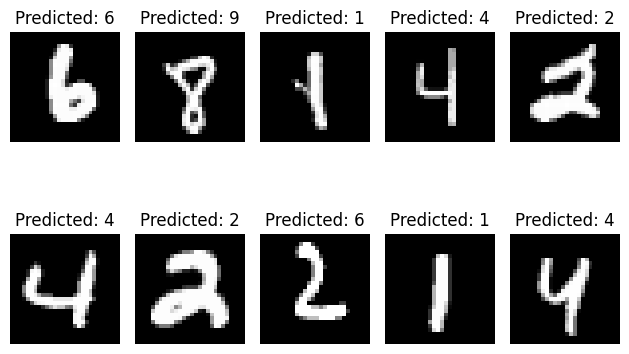

In [ ]:
import matplotlib.pyplot as plt

#def predict(X, params):
#    W1, b1, W2, b2 = params
#    A2, _ = forward_propagation(X, W1, b1, W2, b2)
#    predictions = np.argmax(A2, axis=1)
#    return predictions

# Predicting labels for the entire test set
predictions = predict(test_images, params)

# Selecting 10 random indices
indices = np.random.choice(test_images.shape[0], size=10, replace=False)

for i, idx in enumerate(indices):
    image = test_images[idx]
    label = predictions[idx]  # Convert one-hot encoded prediction to label

    plt.subplot(2, 5, i+1)  # Displaying 10 images in a 2x5 grid
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {label}")
    plt.axis('off')  # Hide axis for clarity

plt.tight_layout()
plt.show()

# Loading Trained Parameters
To load the saved parameters, we can use the np.load() function. Here's an example of how to load the trained parameters:

In [ ]:
# Loading Trained Parameters
with open("trained_params.pkl", "rb") as f:
    loaded_params = pickle.load(f)
    W1, b1, W2, b2 = loaded_params

Now, loaded_params contains the loaded parameters, and you can use them for inference or further training.

By saving and loading the trained parameters, we can easily resume the training process, perform inference on new data, or share the trained model with others without having to retrain the model from scratch.

Implementation Note
When saving and loading parameters, it's important to ensure consistency between the model architecture and the loaded parameters' shapes. If you make any changes to the model architecture, such as adjusting the number of hidden nodes, you will need to handle the compatibility of the saved parameters accordingly.


## Training with Mini-Batches and Stochastic Gradient Descent

In the previous sections, we trained our model using the entire training dataset to update the parameters (weights and biases) at each iteration. However, when dealing with large datasets, processing the entire dataset at once can be computationally expensive and memory-intensive. To address this challenge, we can introduce the concept of mini-batches and leverage stochastic gradient descent (SGD) for more efficient training.

### Mini-Batches

A mini-batch is a subset of the training dataset that is processed at a time during the training loop. Instead of using the entire dataset, we divide it into smaller mini-batches of equal or varying sizes. Each mini-batch contains a batch size number of training examples.

Training with mini-batches has several advantages:

- **Computational Efficiency**: Processing smaller mini-batches requires less memory and computational resources compared to processing the entire dataset at once.

- **Generalization**: By training on different mini-batches in each iteration, the model encounters a wider variety of examples, leading to better generalization and improved performance on unseen data.

- **Noise Reduction**: The mini-batches introduce a level of randomness during training, which can help the model escape from poor local minima and converge to a better solution.

The batch size is a hyperparameter that needs to be carefully chosen. A smaller batch size introduces more randomness and can help the model converge faster, but it also increases the noise in the parameter updates. On the other hand, a larger batch size reduces the noise but may slow down the convergence and require more memory.

### Stochastic Gradient Descent (SGD)

Stochastic gradient descent (SGD) is an optimization algorithm commonly used for training deep neural networks. It is based on the principles of gradient descent but updates the model parameters using the gradients computed on mini-batches instead of the entire dataset.

The steps involved in SGD are as follows:

1. **Randomly Shuffle the Dataset**: Before each epoch, we shuffle the training dataset to ensure that the mini-batches are representative and not biased towards any particular subset of examples.

2. **Divide the Dataset into Mini-Batches**: We divide the shuffled dataset into mini-batches of a specified batch size.

3. **Iterate Over the Mini-Batches**: For each mini-batch, we perform forward propagation to compute the loss and backward propagation to calculate the gradients. The gradients are then used to update the model parameters.

4. **Repeat**: We repeat the process for a specified number of epochs, iterating over all the mini-batches in each epoch.

SGD allows us to make progress with each mini-batch update, which makes it computationally efficient and enables the model to learn from large datasets effectively.

It's worth noting that there are variants of SGD, such as mini-batch gradient descent and batch gradient descent, where the batch size is set to the entire dataset or one, respectively. These variants have different trade-offs in terms of computational efficiency and convergence speed.

In our tutorial, we have been using mini-batch SGD with a specific batch size. The choice of batch size depends on factors such as the available computational resources, dataset size, and the specific problem at hand. Experimenting with different batch sizes can help find the optimal balance between computational efficiency and convergence.



In [ ]:
def train_model2(X, Y, hidden_nodes, num_iterations, learning_rate, batch_size):
    input_nodes = X.shape[1]
    output_nodes = Y.shape[1]
    m = X.shape[0]  # Number of training samples

    # Initialize parameters
    W1, b1, W2, b2 = initialize_parameters(input_nodes, hidden_nodes, output_nodes)

    # Mini-batch gradient descent
    for i in range(num_iterations):
        # Shuffling the training set for each epoch
        permutation = np.random.permutation(m)
        X_shuffled = X[permutation]
        Y_shuffled = Y[permutation]

        # Splitting the training set into batches
        for j in range(0, m, batch_size):
            X_batch = X_shuffled[j:j+batch_size]
            Y_batch = Y_shuffled[j:j+batch_size]

            # Forward propagation
            A2, cache = forward_propagation(X_batch, W1, b1, W2, b2)

            # Compute cost
            cost = compute_cost(A2, Y_batch)

            # Backward propagation
            grads = back_propagation(X_batch, Y_batch, cache, W1, W2)

            # Update parameters
            params = update_parameters((W1, b1, W2, b2), grads, learning_rate)
            W1, b1, W2, b2 = params

        if i % 10 == 0:
            print(f"Cost at iteration {i}: {cost}")

    return W1, b1, W2, b2


In [ ]:
# params = train_model(train_images, train_labels, hidden_nodes=64, num_iterations=100, learning_rate=0.1, batch_size=64)

def evaluate_model(X, Y, params):
    W1, b1, W2, b2 = params
    A2, _ = forward_propagation(X, W1, b1, W2, b2)
    predictions = np.argmax(A2, axis=1)
    labels = np.argmax(Y, axis=1)
    accuracy = np.mean(predictions == labels)
    return accuracy

# Convert labels to one-hot vectors
train_labels = np.eye(10)[train_labels]
test_labels = np.eye(10)[test_labels]

# Train the model
params = train_model2(train_images, train_labels, hidden_nodes=64, num_iterations=30,
                      learning_rate=0.1, batch_size=64)

# Evaluate the model
accuracy = evaluate_model(test_images, test_labels, params)
print(f"Test Accuracy: {accuracy}")


Cost at iteration 0: 0.14144705734733592
Cost at iteration 10: 0.040105111734348727
Cost at iteration 20: 0.03890250313490502
Test Accuracy: 0.9766


In [ ]:
def predict(X, params):
    W1, b1, W2, b2 = params
    Z1 = np.dot(X, W1) + b1
    A1 = np.maximum(Z1, 0)  # ReLU
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)  # softmax
    predictions = np.argmax(A2, axis=1)
    return predictions

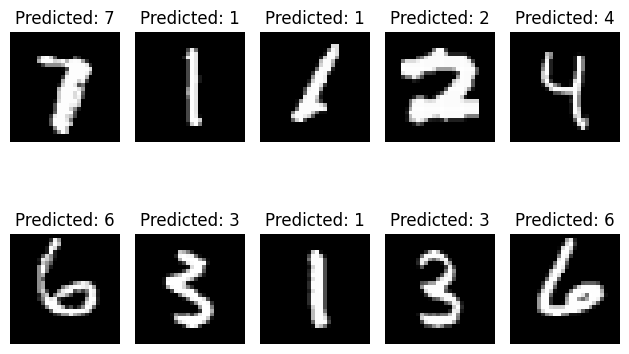

In [ ]:
import matplotlib.pyplot as plt

#def predict(X, params):
#    W1, b1, W2, b2 = params
#    A2, _ = forward_propagation(X, W1, b1, W2, b2)
#    predictions = np.argmax(A2, axis=1)
#    return predictions

# Predicting labels for the entire test set
predictions = predict(test_images, params)

# Selecting 10 random indices
indices = np.random.choice(test_images.shape[0], size=10, replace=False)

for i, idx in enumerate(indices):
    image = test_images[idx]
    label = predictions[idx]  # Convert one-hot encoded prediction to label

    plt.subplot(2, 5, i+1)  # Displaying 10 images in a 2x5 grid
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {label}")
    plt.axis('off')  # Hide axis for clarity

plt.tight_layout()
plt.show()


In [ ]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ...

# Evaluation phase
y_pred = predict(test_images, params)  # Obtain predictions

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='macro')

# Calculate recall
recall = recall_score(y_test, y_pred, average='macro')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='macro')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


In [ ]:
def softmax(Z):
    expZ = np.exp(Z - np.max(Z))  # for numerical stability
    return expZ / expZ.sum(axis=1, keepdims=True)

def predict(X, params):
    W1, b1, W2, b2 = params
    Z1 = np.dot(X, W1) + b1
    A1 = np.maximum(Z1, 0)  # ReLU
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)  # softmax
    predictions = np.argmax(A2, axis=1)
    return predictions
